<a href="https://colab.research.google.com/github/vishalchalana/vishal-ai-blog/blob/master/_notebooks/fastai-chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Understanding computer vision model internals

In [ ]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.9MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 1.2MB 29.4MB/s 
     |████████████████████████████████| 194kB 55.8MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

We are going to try and understand how computer vision model works with MNIST - a collection of images of handwritten digits.

Let's start by downloading the MNIST data (images)

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
doc(untar_data)

In [ ]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
img3_path = threes[1]
img3 = Image.open(img3_path)
img3

## Python arrays and vectors
### Built-in arrays
- Vectors are single dimension arrays. For example `x = [1, 2, 3.4, 10, 99]`
- Access elements by index so, `x[2]` or `x[0]`
- For last element, `x[-1]` and for second last element `x[-2]`
- For a range of elements `x[0:2] = [1, 2]` so it does not include the last element. Can also do `x[2:]` which means, start at 2 and go upto the end
- These can have any data type in them - so mixed is allowed

### Numpy arrays
`import numpy as np`

`y = np.array([1, 2, 3.4, 10, 99])`

- Numpy treats every number as floating point number
- You can do operations like `np.mean(y)` or `np.max(y)` etc.
- Let's try something with numpy arrays here

### Numpy operations
- If you add/subtract etc. arrays of same dimentions, element-wise operation is performed
- If they are of different dimentions, "broadcasting rule" applies if they have compatible shapes

[ 1.   2.   3.4 10.  99. ]
[0.   0.25 0.5  0.75 1.  ]


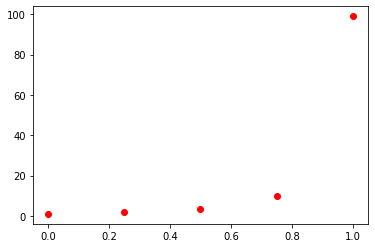

In [ ]:
y = np.array([1, 2, 3.4, 10, 99])
print(y)
t = np.linspace(0,1,5)
print(t)

plt.plot(t, y, 'ro')
plt.show()

In [ ]:
a = np.array([[1,2,3],
             [4,5,6],
             [1,2,3],
             [4,5,6]])
b = np.array([[1,1,1],
             [1,1,1],
             [1,1,1],
             [1,1,1]])
c = np.array([[2,2,2]])
print(a+b)
print(a+c)

[[2 3 4]
 [5 6 7]
 [2 3 4]
 [5 6 7]]
[[3 4 5]
 [6 7 8]
 [3 4 5]
 [6 7 8]]


In [ ]:
y`.shape

(5,)